In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

In [2]:
#Initial Distribution
sigma = np.eye(2)*0.01
mu = np.array([1,2])
n = len(mu)

# Compute Lambda
alpha = 0.9
beta = 2
kappa = 1
lam = (alpha**2)*(n+kappa)-n;

In [3]:
def compute_sigma_points(mu,sigma,lam,alpha,beta):
    # Dimension of sigma points = n
    # number of sigma points = 2*n+1
    n = len(mu)
    
    # Calculating Sigma Points:
    covar_factor = np.sqrt(n+lam)*sqrtm(sigma)
    sigma_points = np.zeros((2*n+1,n))
    sqrt_covar = sqrtm(sigma)
    sigma_points[0] = mu
    for i in xrange(n):
        sigma_points[i+1] = mu + covar_factor[i]
        sigma_points[n+i+1] = mu - covar_factor[i]
    
    # Calculating weights
    w_m = np.zeros(2*n+1)
    w_c = np.zeros(2*n+1)
    
    w_m[0] = lam/(n+lam)
    w_c[0] = w_m[0] + (1-alpha**2+beta)
    w_m[1:] = w_c[1:] = 1/(2*(n+lam))
    
    return sigma_points, w_m, w_c

In [4]:
def transform(sigma_points,transform ='linear'):
    points = np.zeros_like(sigma_points)
    if(transform == 'linear'):
        points[:,0] = sigma_points[:,0] + 1
        points[:,1] = sigma_points[:,1] - 1
    
    elif(transform == 'polar'):
        for i,[x,y] in enumerate(sigma_points):
            r = np.sqrt(x**2+y**2)
            theta = np.arctan2(y,x)
            if( theta > np.pi):
                while(theta > -np.pi):
                    theta = theta - 2*np.pi
            elif(theta < -np.pi):
                while(theta < np.pi):
                    theta = theta + 2*np.pi
            
            points[i]=[r,theta]
    
    elif(transform == 'non_linear'):
        points[:,0] = sigma_points[:,0]*np.cos(sigma_points[:,0])\
                              *np.sin(sigma_points[:,0])
        points[:,1] = sigma_points[:,1]*np.cos(sigma_points[:,1])\
                            *np.sin(sigma_points[:,1])
            

    return points 

In [5]:
import numpy.matlib
def recover_gaussian(trans_sigs,w_m,w_c):
        # preliminary checks
        if(len(trans_sigs) != len(w_m) | len(trans_sigs) != len(w_c)):
            print('Length of weight vector do not match the number of points.')
            raise SystemExit
        # calculating mean
        mu = np.sum(trans_sigs*w_m[:,np.newaxis],axis=0)
        
        # calculating variance
        y_cen = trans_sigs - mu
        w_C = np.matlib.repmat(w_c.reshape(w_c.shape[0],-1),1,len(mu))
        k = np.multiply(w_C,y_cen)
        sigma_r = np.matmul(k.T,y_cen)
        
'''        
        sigma = np.zeros((n,n))
        for i,y in enumerate(y_cen):
            y = y.reshape(2,-1)        # Convert (2,) to (2,1)
            sigma = sigma + w_c[i]*np.matmul(y,y.T)  
'''
        return mu,sigma_r

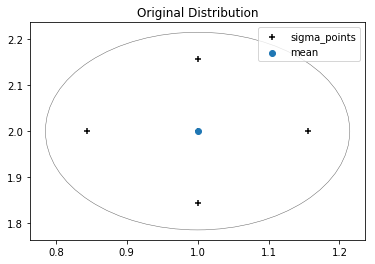

In [6]:
from plotting_tools.plotter import draw_ellipse

plt.figure()
sigma_points , w_m, w_c = compute_sigma_points(mu,sigma,lam,alpha,beta)
draw_ellipse(mu,sigma)
s = plt.scatter(sigma_points[:,0],sigma_points[:,1],c='k',marker='+')
m = plt.scatter(mu[0],mu[1])
plt.title('Original Distribution')
plt.legend([s,m],['sigma_points','mean'])
plt.show()

[[ True False]
 [False  True]]
[[  1.00000000e-02   6.89775245e-32]
 [  6.77927340e-32   1.00000000e-02]]
[[  1.00000000e-02   6.93334780e-32]
 [  6.93334780e-32   1.00000000e-02]]
[[ True False]
 [False  True]]
[[  9.99867212e-03   1.21495593e-05]
 [  1.21495593e-05   2.00492491e-03]]
[[  9.99867212e-03   1.21495593e-05]
 [  1.21495593e-05   2.00492491e-03]]
[[ True False]
 [ True  True]]
[[ 0.00062798 -0.00013394]
 [-0.00013394  0.02737205]]
[[ 0.00062798 -0.00013394]
 [-0.00013394  0.02737205]]


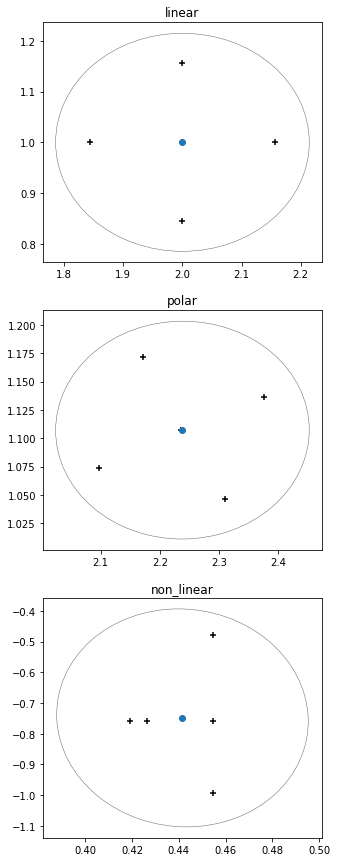

In [7]:
fig, axes = plt.subplots(3,1,figsize=(5,15))
for i,trans in enumerate(['linear','polar','non_linear']):
    sig_trans = transform(sigma_points,transform=trans)
    mu_trans,sigma_trans = recover_gaussian(sig_trans,w_m,w_c)
    ax = axes[i]
    draw_ellipse(mu_trans,sigma_trans,ax=ax)
    s = ax.scatter(sig_trans[:,0],sig_trans[:,1],c='k',marker='+')
    m = ax.scatter(mu_trans[0],mu_trans[1])
    ax.set_title(trans)
    
plt.show()
    